In [136]:
# Import necessary libraries


import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [137]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Arun\Documents\diabetes-dataset.csv")

# Display the first few rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [138]:
# Basic data exploration

print(df.size)
print(df.shape)
print(df.isna().sum())
print(df.dtypes)

18000
(2000, 9)
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [139]:
# Remove duplicate rows

df.drop_duplicates(inplace=True)
df.shape

(744, 9)

In [140]:
# Descriptive statistics of the dataset

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,3.752688,120.892473,68.959677,20.908602,79.534946,32.229704,0.472355,33.142473,0.340054
std,3.335541,31.943115,19.317521,16.311726,111.745897,8.206319,0.326181,11.751286,0.474046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.300000,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.800000,0.632500,40.250000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


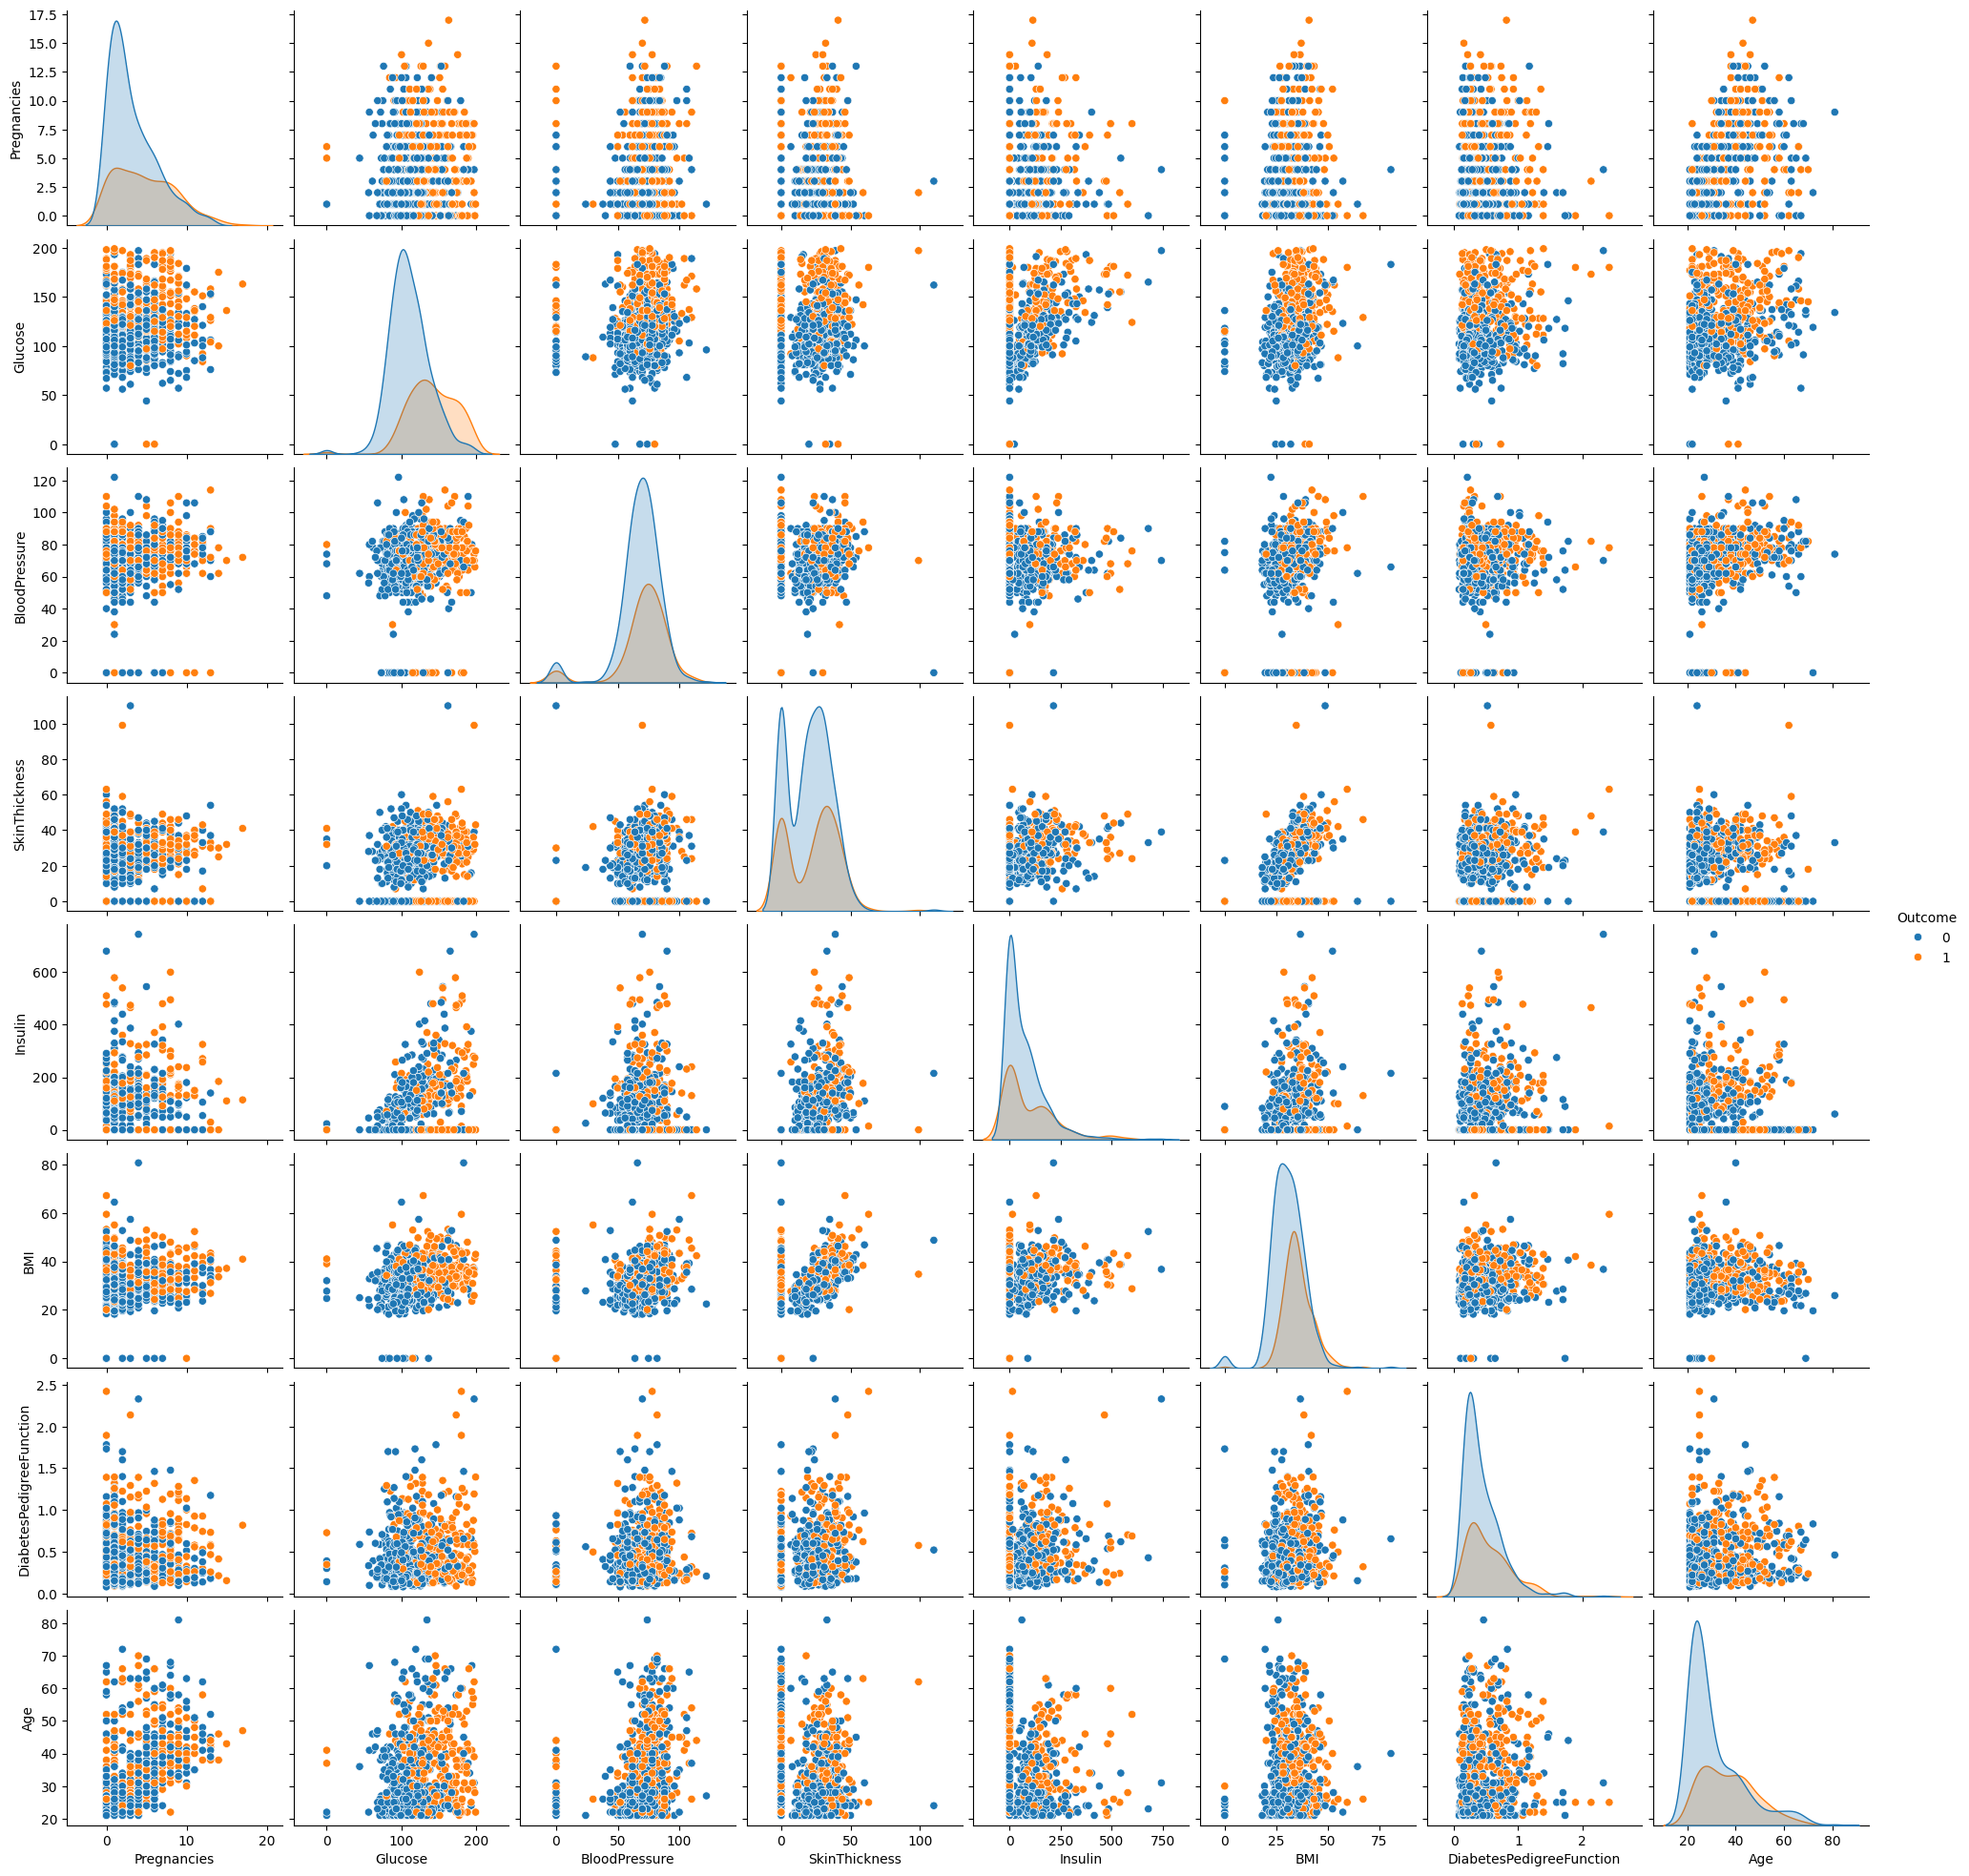

In [141]:
# Pairplot to visualize relationships between features

sns.pairplot(data=df,hue='Outcome')

In [142]:
# Function to collect features

def collection_features(data):    
    features = [col for col in df.columns[:-1]]
    print(df[features].isin({0}).sum())
    return features

In [143]:
# Function to replace zeros with the mean in features

def not_null(features):
  for col in features:
    df[col].replace({ 0 : df[col].mean() }, inplace=True)
    print(df[features].isin({0}).sum())
  return df

In [144]:
# Function to remove outliers

def removing_ouliers(df,features):    
    for col in features[:-1]:
        q1= df[col].quantile(0.25)
        q3= df[col].quantile(0.75)
        iqr = q3-q1
        lower_limit=q1-1.5*iqr
        upper_limit=q3+1.5*iqr
        
        no_outliers=df[(df[col]> lower_limit) & (df[col]>upper_limit)]
    return no_outliers    
        

In [145]:
# Function to remove unwanted features

def removing_unwanted_features(data):    
    data.drop(columns=['Pregnancies','Insulin','BloodPressure'], axis=1,inplace=True)
    return data

In [146]:
# Function to create X and y for model training

def creating_X_y(no_outliers):
    input_x = no_outliers.drop(['Outcome'],axis=1)
    input_y = no_outliers.Outcome
    
    return input_x, input_y


In [147]:
# Function for oversampling using SMOTE

def over_sampling(x,y):    
    smote = SMOTE(sampling_strategy = 'auto', random_state=0)
    x_resampled , y_resampled = smote.fit_resample(x,y)
    return x_resampled , y_resampled

In [148]:
# Function to split data using Stratified K-Fold

def split_data(x,y):
    n_splits = 5  # Choose the number of folds you want
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=69)
    for train_index, test_index in stratified_kfold.split(x, y):
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
    return X_train, X_test , y_train, y_test    

In [149]:
# Function for preprocessing steps

def pre_processing(data):
    features = collection_features(data)
    df1 = not_null(features)
    no_outliers = removing_ouliers(df1,features)
    no_outliers1 = removing_unwanted_features(no_outliers)
    input_x, input_y = creating_X_y(no_outliers1)  
    x_resampled , y_resampled =  over_sampling(input_x, input_y)
    X_train, X_test , y_train, y_test = split_data(x_resampled , y_resampled)
    
    return features, X_train, X_test , y_train, y_test , no_outliers

In [150]:
# Preprocess the data

features, X_train, X_test , y_train, y_test , no_outliers1 = pre_processing(df)

Pregnancies                 112
Glucose                       5
BloodPressure                34
SkinThickness               215
Insulin                     359
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
dtype: int64
Pregnancies                   0
Glucose                       5
BloodPressure                34
SkinThickness               215
Insulin                     359
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
dtype: int64
Pregnancies                   0
Glucose                       0
BloodPressure                34
SkinThickness               215
Insulin                     359
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
dtype: int64
Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               215
Insulin                     359
BMI                          10
D

C:\Users\Arun\AppData\Local\Temp\ipykernel_2340\4002802469.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Pregnancies','Insulin','BloodPressure'], axis=1,inplace=True)


In [151]:
# Train a RandomForestClassifier model

rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(X_train,y_train)

# Model evaluation

rf.score(X_test,y_test)

1.0

In [152]:
# Feature importance

impo_feartures = np.array(rf.feature_importances_)
column_names = np.array(no_outliers.columns[:-1])
impo_feartures_with_columns = np.column_stack((impo_feartures,column_names))
impo_feartures_with_columns

array([[0.17408003802699287, 'Glucose'],
       [0.2292116664830187, 'SkinThickness'],
       [0.18641223614707508, 'BMI'],
       [0.30629721655796177, 'DiabetesPedigreeFunction'],
       [0.10399884278495168, 'Age']], dtype=object)

In [153]:
# Model prediction on the test set

y_pret = rf.predict(X_test)


# Model evaluation metrics

accuracy_score(y_test, y_pret)

1.0

<Axes: >

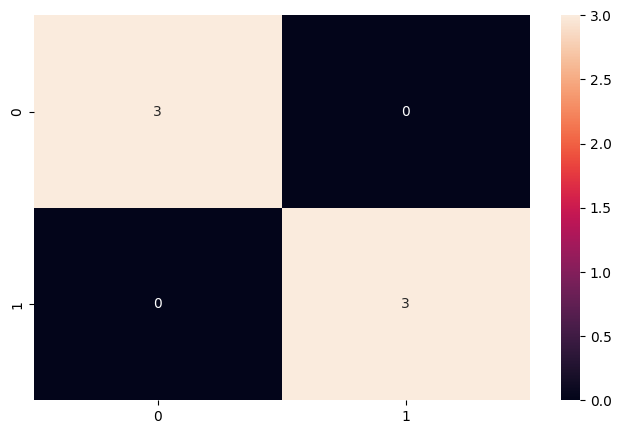

In [154]:
# Confusion matrix

cm = confusion_matrix(y_test,y_pret)
plt.figure(figsize=(8,5))
sns.heatmap(data=cm, annot=True)

In [155]:
# Classification report

print(classification_report(y_test,y_pret))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



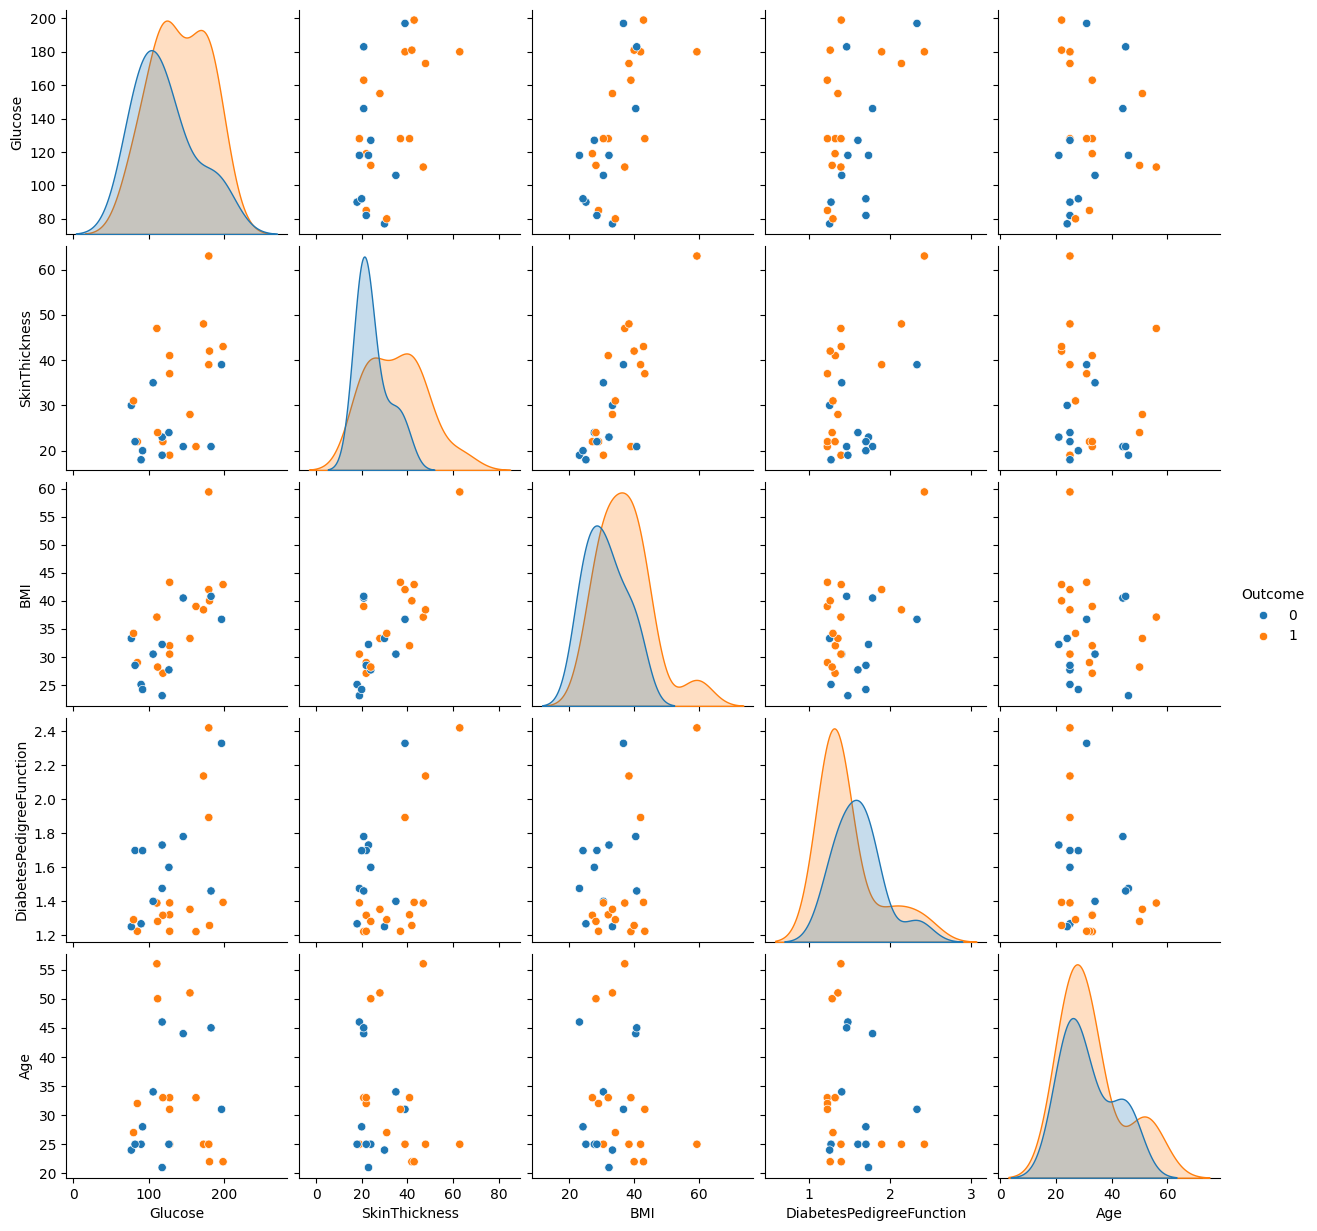

In [156]:
# Pairplot for visualizing relationships in the pre-processed data

sns.pairplot(data=no_outliers1,hue='Outcome')

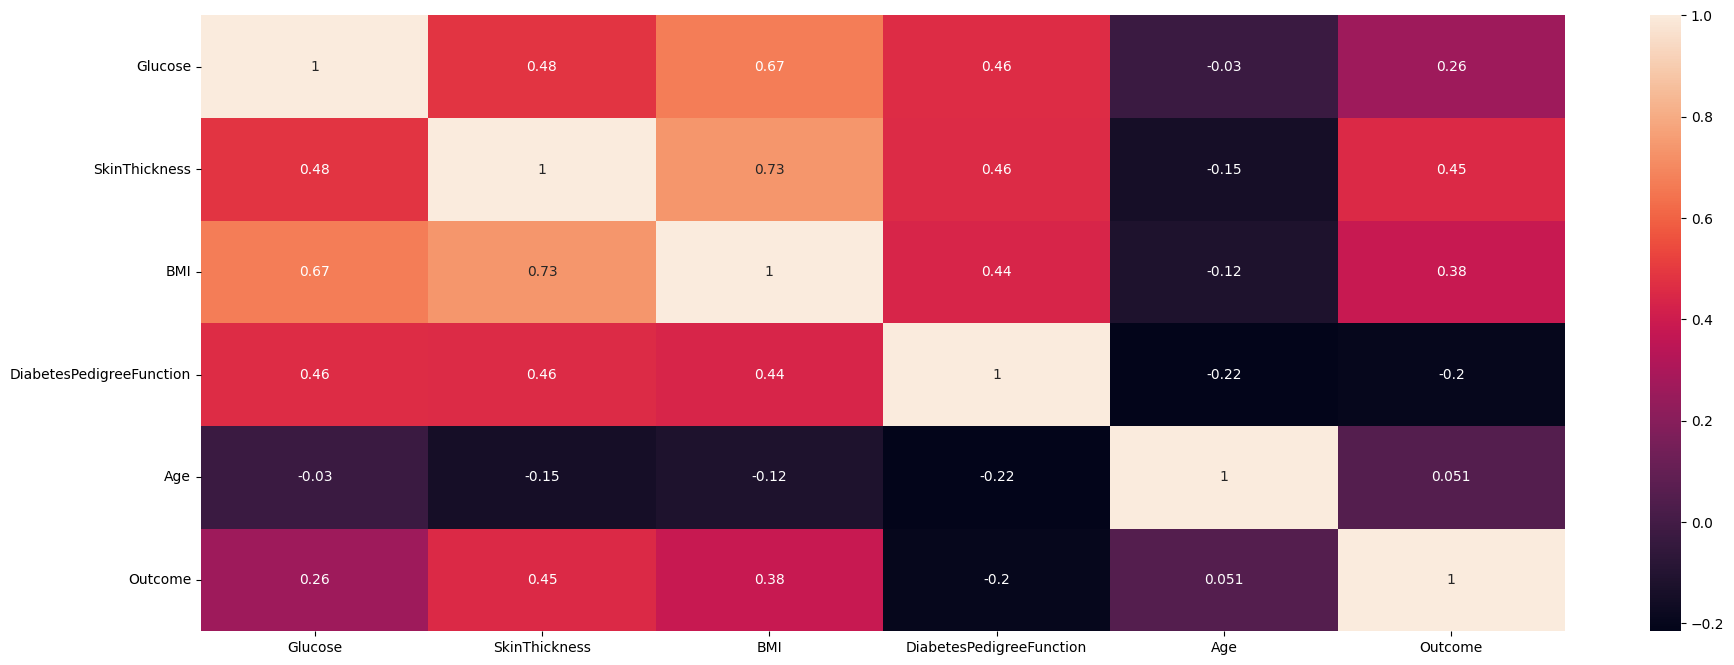

In [157]:
# Correlation matrix heatmap

plt.figure(figsize = (22, 8))
sns.heatmap(no_outliers1.corr(), annot = True)
plt.show()

In [158]:
from sklearn.metrics import roc_curve, roc_auc_score

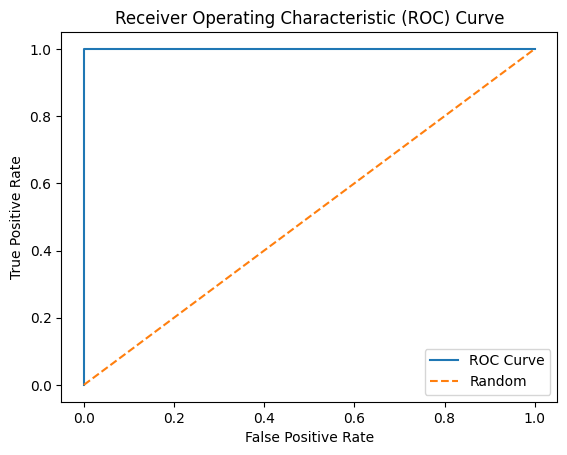

In [159]:
# Plot ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pret)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [160]:
# AUC Score

roc_auc_score(y_test,y_pret)

1.0